# SiPM width

This notebook is to check the sipm width within pmaps, and compare with the S2w found by the kdsts.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import tables as tb

from invisible_cities.io import pmaps_io
from invisible_cities.io.dst_io import load_dsts, df_writer
from invisible_cities.database.load_db  import DataPMT, DataSiPM
from invisible_cities.core import system_of_units as units

In [2]:
num_files = 3
run_number = 8088
num_plots = 3
data_dir = '../../data/trigger1/'+str(run_number)
file_start = 'run_'+str(run_number)+'_000'
file_end = '_trigger1_waveforms.h5'
raw_files = glob.glob(data_dir+'/waveforms/*.h5') #[data_dir+file_start+str(i+1)+file_end for i in range(0,num_files)]
pmap_files = glob.glob(data_dir+'/pmaps/*.h5')
kdst_files = glob.glob(data_dir+'/kdsts/sthresh/*.h5')
raw_files.sort()
pmap_files.sort()
kdst_files.sort()

In [3]:
raw_files

['../../data/trigger1/8088/waveforms/run_8088_0000_trigger1_waveforms.h5',
 '../../data/trigger1/8088/waveforms/run_8088_0001_trigger1_waveforms.h5',
 '../../data/trigger1/8088/waveforms/run_8088_0929_trigger1_waveforms.h5',
 '../../data/trigger1/8088/waveforms/run_8088_2999_trigger1_waveforms.h5']

In [4]:
pmap_files

['../../data/trigger1/8088/pmaps/run_8088_trigger1_1_pmaps.h5',
 '../../data/trigger1/8088/pmaps/run_8088_trigger1_2_pmaps.h5',
 '../../data/trigger1/8088/pmaps/run_8088_trigger1_3_pmaps.h5',
 '../../data/trigger1/8088/pmaps/run_8088_trigger1_929_pmaps.h5']

In [5]:
kdst_files

['../../data/trigger1/8088/kdsts/sthresh/run_8088_trigger1_0_kdst.h5',
 '../../data/trigger1/8088/kdsts/sthresh/run_8088_trigger1_1_kdst.h5',
 '../../data/trigger1/8088/kdsts/sthresh/run_8088_trigger1_2999_kdst.h5',
 '../../data/trigger1/8088/kdsts/sthresh/run_8088_trigger1_929_kdst.h5']

In [6]:
pmaps = pmaps_io.load_pmaps(pmap_files[-1])
pmaps.keys()

dict_keys([144925, 144926, 144927, 144928, 144929, 144930, 144931, 144932, 144933, 144934, 144935, 144936, 144937, 144938, 144939, 144940, 144941, 144942, 144943, 144944, 144945, 144946, 144947, 144948, 144949, 144950, 144951, 144952, 144953, 144954, 144955, 144956, 144957, 144958, 144959, 144960, 144961, 144962, 144963, 144964, 144965, 144966, 144967, 144968, 144969, 144970, 144971, 144972, 144973, 144974, 144975, 144976, 144977, 144978, 144979, 144980, 144981, 144982, 144983, 144984, 144985, 144987, 144988, 144989, 144990, 144991, 144992, 144993, 144994, 144995, 144996, 144998, 144999, 145000, 145001, 145002, 145003, 145004, 145005, 145006, 145007, 145008, 145009, 145010, 145011, 145012, 145013, 145014, 145015, 145016, 145017, 145018, 145019, 145020, 145021, 145022, 145023, 145024, 145025, 145026, 145027, 145028, 145029, 145030, 145031, 145032, 145033, 145034, 145035, 145036, 145037, 145038, 145039, 145040, 145041, 145042, 145043, 145044, 145045, 145046, 145047, 145048, 145049, 14505

In [372]:
evt = 144925
pmap = pmaps[evt]
s2 = pmap.s2s[0]
len(s2.times)

7

In [373]:
sipm_widths = []
for evt in pmaps.keys():
    if pmaps[evt].s2s:
        sipm_widths.append(len(pmaps[evt].s2s[0].times))

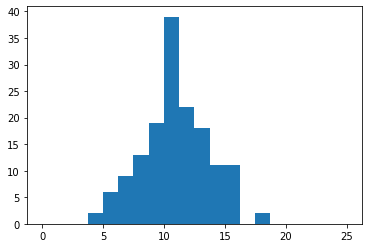

In [374]:
plt.hist(sipm_widths, bins = 20, range=(0,25))
plt.show()

In [7]:
kdsts = load_dsts([kdst_files[-1]], 'DST', 'Events')

In [8]:
kdsts

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
0,144925,1.594477e+09,0,0,1,1,150.0,2.110167,8.891668,718675.0,...,17,83.810379,83.810379,1.014146,21.276998,-3.932708,21.637395,-0.182771,7.226640,8.418601
1,144926,1.594477e+09,0,0,1,1,275.0,2.289542,14.304738,685650.0,...,20,116.847252,116.847252,1.684631,-138.050573,86.362297,162.838592,2.582573,9.123418,9.072797
2,144927,1.594477e+09,0,0,1,1,225.0,2.972367,15.903880,448575.0,...,17,354.946594,354.946594,1.913521,-63.580265,-122.904730,138.376380,-2.048199,8.651235,9.131230
3,144928,1.594477e+09,0,0,1,1,125.0,1.350080,5.427705,738975.0,...,17,63.471752,63.471752,1.159067,0.533891,102.018815,102.020212,1.565563,11.317618,8.406112
4,144929,1.594477e+09,0,0,1,1,175.0,1.767896,8.604972,595425.0,...,17,207.065826,207.065826,1.513708,-40.104703,-152.165389,157.361662,-1.828496,8.466232,8.225290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,145076,1.594477e+09,0,0,1,1,225.0,2.045028,11.040084,614800.0,...,18,187.695007,187.695007,1.453996,39.885985,-163.502806,168.297532,-1.331523,8.210331,8.958260
147,145077,1.594477e+09,0,0,1,1,125.0,1.359518,5.149822,719875.0,...,21,82.612320,82.612320,1.041569,84.015343,133.118251,157.413616,1.007799,10.161108,8.402734
148,145078,1.594477e+09,0,0,1,1,200.0,1.593788,9.270765,735450.0,...,17,67.008812,67.008812,0.874637,-60.135416,52.992311,80.152687,2.419253,7.953785,11.422173
149,145079,1.594477e+09,0,0,1,1,200.0,2.289036,10.859694,609150.0,...,20,193.330383,193.330383,1.415733,-79.345105,180.079536,196.784870,1.985815,8.734801,9.860100


(array([ 3.,  3., 14., 25., 18., 16., 27., 12., 17.,  9.,  2.,  0.,  4.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 4.35   ,  5.36625,  6.3825 ,  7.39875,  8.415  ,  9.43125,
        10.4475 , 11.46375, 12.48   , 13.49625, 14.5125 , 15.52875,
        16.545  , 17.56125, 18.5775 , 19.59375, 20.61   , 21.62625,
        22.6425 , 23.65875, 24.675  ]),
 <a list of 20 Patch objects>)

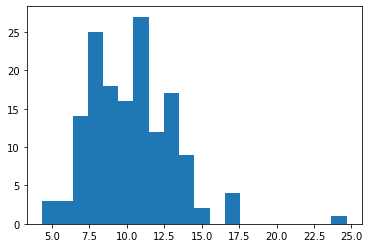

In [377]:
plt.hist(kdsts.S2w, bins=20 )#, range=(0,25), label='S2w', alpha=0.5)

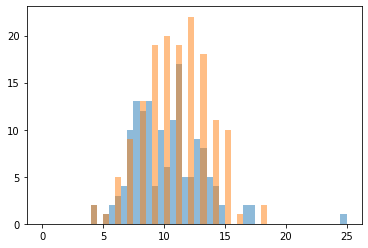

In [378]:
plt.hist(kdsts.S2w, bins=50, range=(0,25), label='S2w', alpha=0.5)
plt.hist(sipm_widths, bins = 50, range=(0,25), label='sipm bins', alpha=0.5)
plt.show()

### Check that we can match events correctly

In [357]:
# Get SiPM position information
dbfile = 'new'
datasipm   = DataSiPM(dbfile, run_number)
sipm_xs    = datasipm.X.values
sipm_ys    = datasipm.Y.values
sipm_xys   = np.stack((sipm_xs, sipm_ys), axis=1)

In [379]:
### Select events with 1 S1 and 1 S2
mask_s1 = kdsts.nS1==1
mask_s2 = np.zeros_like(mask_s1)
mask_s2[mask_s1] = kdsts[mask_s1].nS2 == 1
nevts_after      = kdsts[mask_s2].event.nunique()
nevts_before     = kdsts[mask_s1].event.nunique()
eff              = nevts_after / nevts_before
print('S2 selection efficiency: ', eff*100, '%')

S2 selection efficiency:  99.10714285714286 %


In [380]:
pmap_evt_ids = load_dsts([pmap_files[-1]], "Run", "events")
good_events = np.intersect1d(pmap_evt_ids.evt_number.to_numpy(), kdsts[mask_s2].event.to_numpy())

In [381]:
len(pmap_evt_ids), len(good_events), len(kdsts[mask_s2])

(153, 111, 111)

In [382]:
kdsts

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
0,144925,1.594477e+09,0,0,1,1,150.0,2.110167,8.891668,718675.0,...,17,83.810379,83.810379,1.014146,21.276998,-3.932708,21.637395,-0.182771,7.226640,8.418601
1,144926,1.594477e+09,0,0,1,1,275.0,2.289542,14.304738,685650.0,...,20,116.847252,116.847252,1.684631,-138.050573,86.362297,162.838592,2.582573,9.123418,9.072797
2,144927,1.594477e+09,0,0,1,1,225.0,2.972367,15.903880,448575.0,...,17,354.946594,354.946594,1.913521,-63.580265,-122.904730,138.376380,-2.048199,8.651235,9.131230
3,144928,1.594477e+09,0,0,1,1,125.0,1.350080,5.427705,738975.0,...,17,63.471752,63.471752,1.159067,0.533891,102.018815,102.020212,1.565563,11.317618,8.406112
4,144929,1.594477e+09,0,0,1,1,175.0,1.767896,8.604972,595425.0,...,17,207.065826,207.065826,1.513708,-40.104703,-152.165389,157.361662,-1.828496,8.466232,8.225290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,145076,1.594477e+09,0,0,1,1,225.0,2.045028,11.040084,614800.0,...,18,187.695007,187.695007,1.453996,39.885985,-163.502806,168.297532,-1.331523,8.210331,8.958260
147,145077,1.594477e+09,0,0,1,1,125.0,1.359518,5.149822,719875.0,...,21,82.612320,82.612320,1.041569,84.015343,133.118251,157.413616,1.007799,10.161108,8.402734
148,145078,1.594477e+09,0,0,1,1,200.0,1.593788,9.270765,735450.0,...,17,67.008812,67.008812,0.874637,-60.135416,52.992311,80.152687,2.419253,7.953785,11.422173
149,145079,1.594477e+09,0,0,1,1,200.0,2.289036,10.859694,609150.0,...,20,193.330383,193.330383,1.415733,-79.345105,180.079536,196.784870,1.985815,8.734801,9.860100


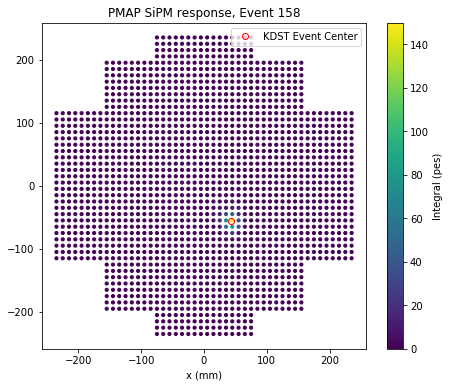

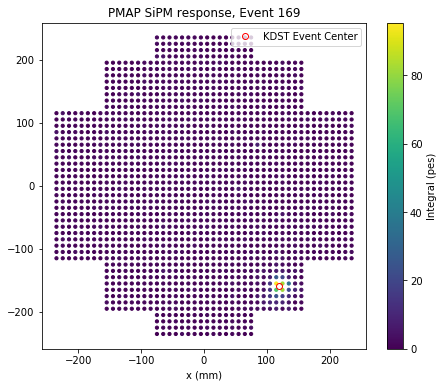

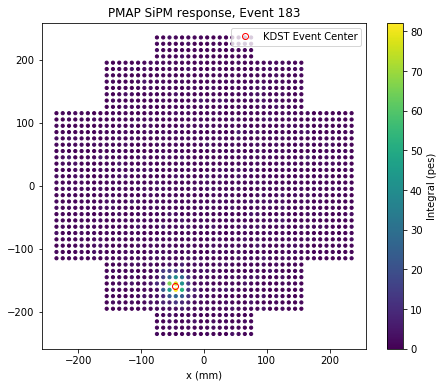

In [323]:
for i in range(3):
    event = int(good_events[i*10])
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(datasipm.X, datasipm.Y, s=10, c=pmaps[event].s2s[0].sipms.sum_over_times)
    plt.plot(kdsts[kdsts.event==event].X, kdsts[kdsts.event==event].Y, 'o', color='red', label='KDST Event Center',fillstyle='none')
    plt.xlabel("x (mm)")
    plt.colorbar().set_label("Integral (pes)")
    plt.title("PMAP SiPM response, Event "+str(event))
    plt.legend()
    plt.show()

# Select events that appear in both pmaps and kdsts

In [385]:
sipm_widths = []
for evt in good_events:
    if pmaps[evt].s2s:
        if np.shape(pmaps[evt].s2s[0].sipms.all_waveforms)[1] != len(pmaps[evt].s2s[0].times):
            print('Not same size!')
        sipm_widths.append(len(pmaps[evt].s2s[0].times))

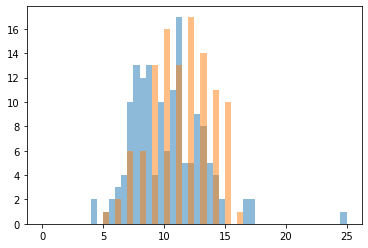

In [386]:
plt.hist(kdsts.S2w, bins=50, range=(0,25), label='S2w', alpha=0.5)
plt.hist(sipm_widths, bins = 50, range=(0,25), label='sipm bins', alpha=0.5)
plt.show()

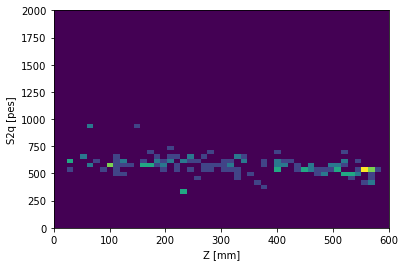

In [112]:
plt.hist2d(kdsts.Z, kdsts.S2q, bins=[50,50], range=[(0,600), (0,2000)])
plt.xlabel('Z [mm]')
plt.ylabel('S2q [pes]')
plt.show()

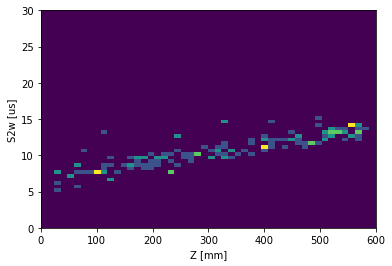

In [143]:
plt.hist2d(kdsts.Z, kdsts.S2w, bins=[50,60], range=[(0,600), (0,30)])
plt.xlabel('Z [mm]')
plt.ylabel('S2w [us]')
plt.show()

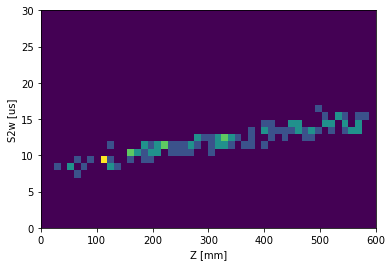

In [142]:
plt.hist2d(kdsts[mask_s2].Z, sipm_widths, bins=[50,30], range=[(0,600), (0,30)])
plt.xlabel('Z [mm]')
plt.ylabel('S2w [us]')
plt.show()

Text(0.5, 1.0, 'SiPMs')

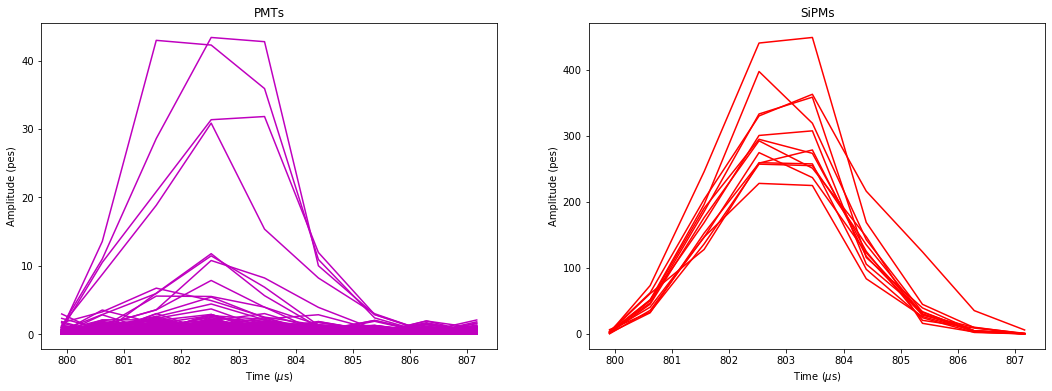

In [144]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
for s2 in pmap.s2s:
    for sipm in s2.sipms.all_waveforms:
        plt.plot(s2.times / 1e3, sipm, c="m")
    #plt.text(s2.times.min() / 1e3, sipm.max(), "S2 PMTs", color="m", ha="right")
plt.xlabel("Time ($\mu$s)")
plt.ylabel("Amplitude (pes)")
plt.title("SiPMs")
#plt.tight_layout()

plt.subplot(1,2,2)
for s2 in pmap.s2s:
    for pmt in s2.pmts.all_waveforms:
        plt.plot(s2.times / 1e3, pmt, c="r")
    #plt.text(s2.times.min() / 1e3, pmt.max(), "S2 PMTs", color="r", ha="right")
plt.xlabel("Time ($\mu$s)")
plt.ylabel("Amplitude (pes)")
plt.title("PMTs")
#plt.tight_layout()

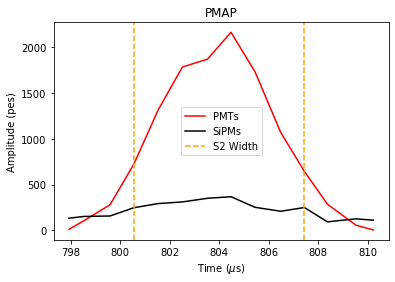

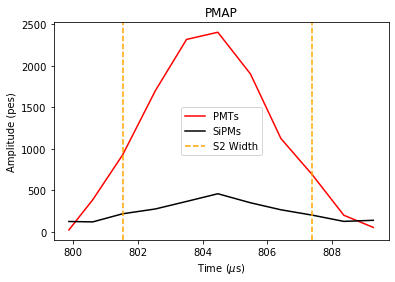

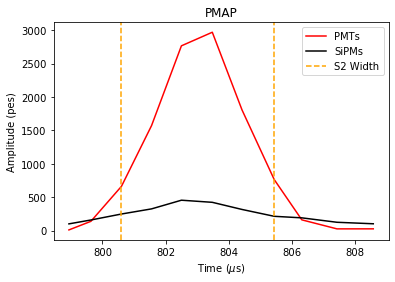

In [216]:
for i in range(3):
    event = good_events[i*10]
    pmap = pmaps[event]
    if pmap.s2s:
        s2 = pmap.s2s[0]
        abv_thresh = s2.pmts.where_above_threshold(500)
        plt.plot(s2.times / 1e3, s2.pmts.sum_over_sensors, c="red", label='PMTs')
        plt.plot(s2.times / 1e3, s2.sipms.sum_over_sensors, c="black", label='SiPMs')
        plt.axvline(x=s2.times[abv_thresh][0] / 1e3, ymin=0, ymax=3500, color='orange', linestyle='dashed', label='S2 Width')
        plt.axvline(x=s2.times[abv_thresh][-1] / 1e3, ymin=0, ymax=3500, color='orange', linestyle='dashed')
    plt.xlabel("Time ($\mu$s)")
    plt.ylabel("Amplitude (pes)")
    plt.title("PMAP")
    plt.legend()
    plt.show()

# Testing noise subtraction

In [230]:
m = 124.

q_s2wnoisesub = kdsts[mask_s2].S2q.to_numpy() - m*(kdsts[mask_s2].S2w.to_numpy())
q_sipmwidth_noisesub = kdsts[mask_s2].S2q.to_numpy()  - m * np.array(sipm_widths)

In [240]:
q_s2wnoisesub

array([-1007.2217041 ,  -277.33876953,  -838.49752197,  -907.82908936,
        -867.72141113,  -493.41453857, -1123.878479  ,  -393.79304199,
        -657.09736328,  -930.41716309,  -567.85565186,  -974.03676758,
        -956.55355225,  -767.55454102,  -707.52720947,  -638.64692383,
       -1015.2675293 ,  -835.959021  ,  -324.91270752, -1117.35629883,
        -613.31297607,  -766.34553223, -1032.38737793,  -776.66772461,
        -420.20953369,  -638.90461426,  -923.67305908,  -534.44530029,
        -898.71696777,  -192.62758789,  -590.4953125 , -1309.98222656,
        -710.60550537,  -603.77926025,  -962.87785645,  -394.86871338,
        -452.0335083 ,  -768.01763916,  -557.08168945,  -559.06431885,
        -519.14790039,  -370.45113525,  -798.75212402,  -401.25819092,
       -1167.61988525,  -687.12279053, -1149.06533203, -1040.34395752,
        -731.40118408,  -404.78829346,  -894.14794922,  -838.3640686 ,
        -531.40804443,  -478.731604  ,  -210.28702393, -1144.2137207 ,
      

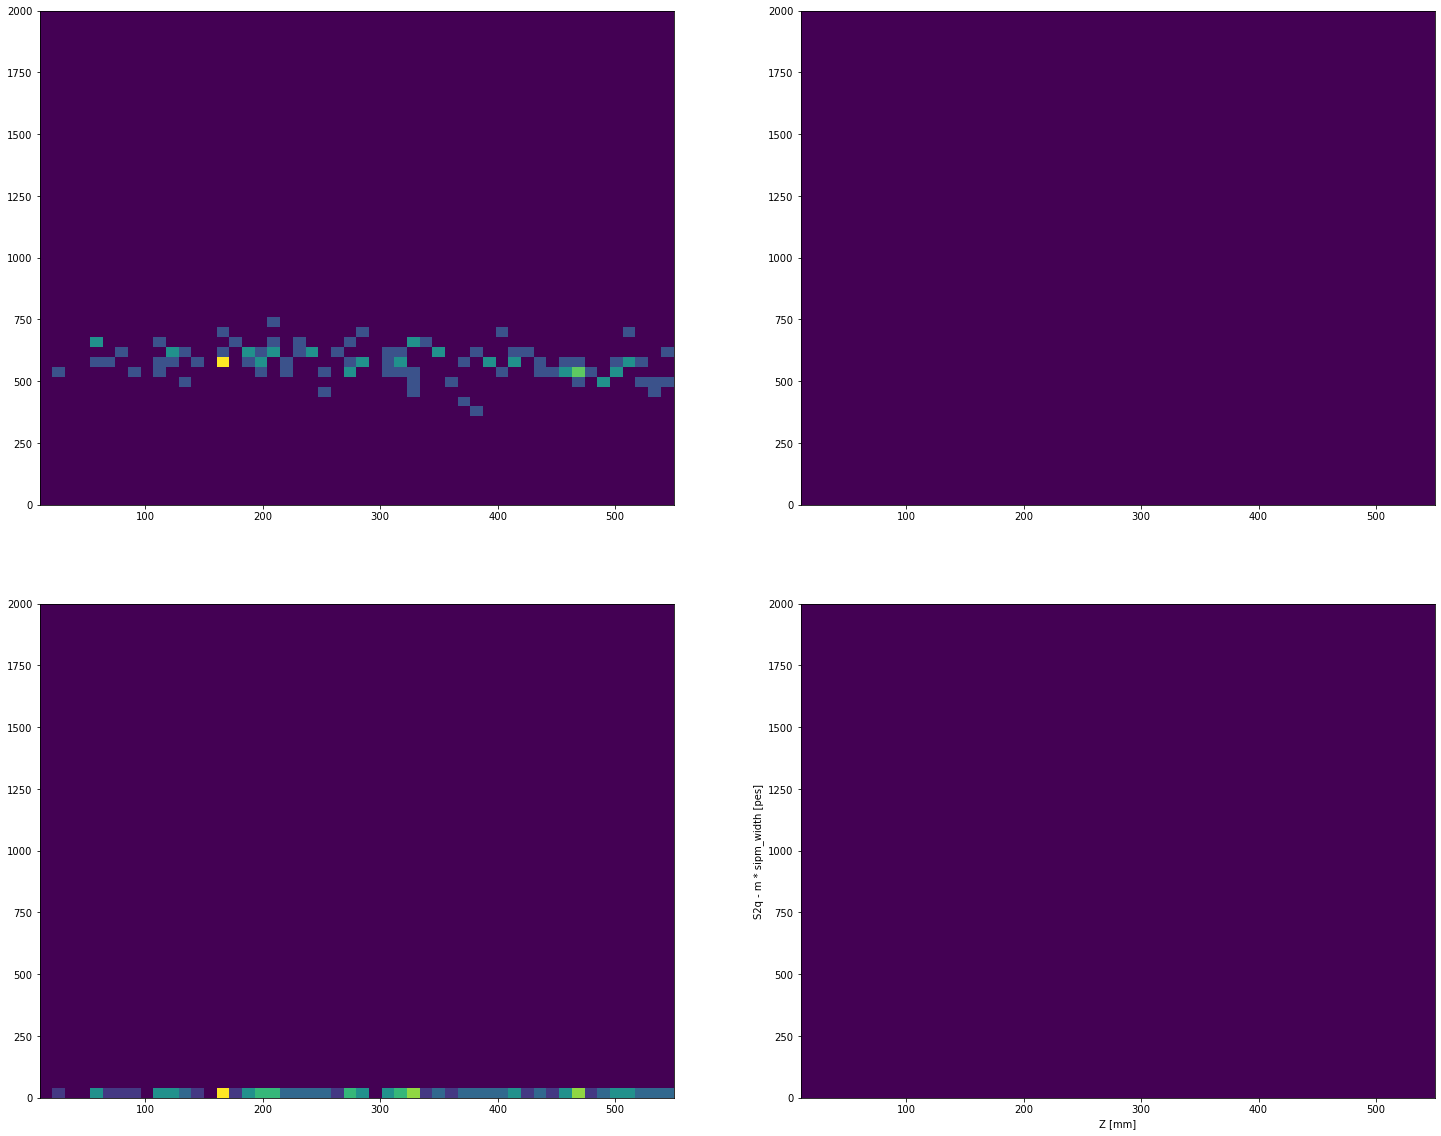

In [239]:
# Plot Z distribution between the two
z_range_plot = (10, 550)
q_range_plot = (0,2000)
#fig = plt.figure(figsize=(25,20))
fig, axs = plt.subplots(2, 2, figsize=(25,20))
axs[0,0].hist2d(kdsts[mask_s2].Z, kdsts[mask_s2].S2q, bins=[50,50], range=[z_range_plot, q_range_plot])
plt.xlabel('Z [mm]')
plt.ylabel('S2q [pes]')
#plt.subplot(2, 2, (1,2))
axs[0,1].hist2d(kdsts[mask_s2].Z, q_s2wnoisesub, bins=[50,50], range=[z_range_plot, q_range_plot])
plt.xlabel('Z [mm]')
plt.ylabel('S2q - m*S2w [pes]')

#plt.subplot(2, 1, (2,1))
axs[1,0].hist2d(kdsts[mask_s2].Z, sipm_widths, bins=[50,50], range=[z_range_plot, q_range_plot])
plt.xlabel('Z [mm]')
plt.ylabel('S2q [pes]')
#plt.subplot(2, 1, (2,2))
axs[1,1].hist2d(kdsts[mask_s2].Z, q_sipmwidth_noisesub, bins=[50,50], range=[z_range_plot, q_range_plot])
plt.xlabel('Z [mm]')
plt.ylabel('S2q - m * sipm_width [pes]')
plt.show()

In [245]:
pmap_evt_ids = load_dsts([pmap_files[i]], "Run", "events")

In [246]:
pmap_evt_ids

,evt_number,timestamp
0,313,1594458937998
1,314,1594458938267
2,315,1594458938337
3,316,1594458938349
4,317,1594458938446
...,...,...
149,464,1594458957533
150,465,1594458957645
151,466,1594458957991
152,467,1594458958008


In [260]:
widths = pd.DataFrame()
for i in range(len(pmap_files)):
    pmaps = pmaps_io.load_pmaps(pmap_files[i])
    pmap_info = load_dsts([pmap_files[i]], "Run", "events")
    sipm_widths = []
    for evt in pmaps.keys():
        if pmaps[evt].s2s:
            if np.shape(pmaps[evt].s2s[0].sipms.all_waveforms)[1] != len(pmaps[evt].s2s[0].times):
                print('Not same size!')
            sipm_widths.append(len(pmaps[evt].s2s[0].times))
    pmap_info['width'] = sipm_widths
    widths = pd.concat([widths, pmap_info])


In [262]:
widths.width

0       9
1      14
2      12
3       8
4      12
       ..
148    11
149     9
150     7
151     9
152    16
Name: width, Length: 771, dtype: int64

In [363]:
with tb.open_file(kdst_files[-1], 'a') as file:
    print(file)

../../data/trigger1/8088/kdsts/sthresh/test.h5 (File) ''
Last modif.: 'Mon May  8 15:56:58 2023'
Object Tree: 
/ (RootGroup) ''
/DST (Group) ''
/DST/Events (Table(161,), shuffle, zlib(4)) 'KDST Events'
/Filters (Group) ''
/Filters/s12_selector (Table(156,), shuffle, zlib(4)) 'Event has passed filter flag'
/Run (Group) ''
/Run/events (Table(131,), shuffle, zlib(4)) 'event info table'
/Run/runInfo (Table(131,), shuffle, zlib(4)) 'run info table'



In [364]:
kdst_evt_ids = load_dsts([kdst_files[-1]], "Run", "events")

In [366]:
kdst_files[-1]

'../../data/trigger1/8088/kdsts/sthresh/test.h5'

In [268]:
this_file = '/Users/taylorcontreras/Development/Research/nz_studies/data/trigger1/8088/kdsts/sthresh/test.h5'
with tb.open_file(this_file, 'a') as file:
    print(file.root.DST.Events)
    #file.root.RD.sipmrwf[:] = zs_wfs

/DST/Events (Table(161,), shuffle, zlib(4)) 'KDST Events'


In [ ]:
kdsts = load_dsts([kdst_files[0]], 'DST', 'Events')

In [284]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]},
                  index=['a', 'b', 'c'])  
df.to_hdf('data.h5', key='df', mode='w')

In [285]:
with tb.open_file('data.h5', 'a') as file:
    print(file)

data.h5 (File) ''
Last modif.: 'Mon May  8 15:41:03 2023'
Object Tree: 
/ (RootGroup) ''
/df (Group) ''
/df/axis0 (Array(2,)) ''
/df/axis1 (Array(3,)) ''
/df/block0_items (Array(2,)) ''
/df/block0_values (Array(3, 2)) ''



In [287]:
saved_df = pd.read_hdf('data.h5', 'df')  

In [288]:
saved_df

,A,B
a,1,4
b,2,5
c,3,6


In [289]:
df

,A,B
a,1,4
b,2,5
c,3,6


In [383]:
len(kdsts[mask_s2])

111

In [388]:
len(sipm_widths)

111

In [390]:
kdst_widths = np.zeros_like(kdsts.S2w)
kdst_widths[mask_s2] = sipm_widths

In [402]:
kdsts.S2w = kdst_widths
kdsts['S2w_sipm'] = kdst_widths

In [404]:
kdsts.to_hdf('data.h5', key='df', mode='w')

In [405]:
saved_df = pd.read_hdf('data.h5', 'df')  

In [408]:
saved_df.S2w_sipm

0       7.0
1      10.0
2      12.0
3      10.0
4      10.0
       ... 
146    11.0
147     9.0
148     7.0
149     9.0
150    16.0
Name: S2w_sipm, Length: 151, dtype: float64

In [413]:
kdst_file = '../../data/trigger1/8088/kdsts/sthresh/run_8088_trigger1_1_kdst.h5'
pmap_file = '../../data/trigger1/8088/pmaps/run_8088_trigger1_1_pmaps.h5'

In [431]:
dst = load_dsts([kdst_file], 'DST', 'Events')

### Select events with 1 S1 and 1 S2
mask_s1 = dst.nS1==1
mask_s2 = np.zeros_like(mask_s1)
mask_s2[mask_s1] = dst[mask_s1].nS2 == 1
nevts_after      = dst[mask_s2].event.nunique()
nevts_before     = dst[mask_s1].event.nunique()
eff              = nevts_after / nevts_before
print('S2 selection efficiency: ', eff*100, '%')

# Get good events
pmap_evt_ids = load_dsts([pmap_file], "Run", "events")
good_events = np.intersect1d(pmap_evt_ids.evt_number.to_numpy(), dst[mask_s2].event.to_numpy())
mask_evt = np.isin(dst.event.to_numpy(), good_events)
mask_evt = mask_s2 & mask_evt

S2 selection efficiency:  98.36065573770492 %


In [432]:
len(mask_evt)

151

In [415]:
good_events

array([158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199, 200, 201,
       202, 203, 204, 207, 209, 210, 211, 212, 214, 215, 216, 217, 218,
       220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 232, 233,
       234, 235, 236, 238, 239, 240, 241, 242, 243, 244, 245, 247, 248,
       249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
       262, 264, 265, 266, 267, 268, 269, 270, 272, 273, 274, 276, 277,
       278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 291, 292,
       293, 294, 295, 297, 298, 299, 300, 301, 302, 303, 305, 306, 307,
       308, 309, 310, 311, 312], dtype=int32)

In [433]:
# Get SiPM Widths from PMAPs
pmaps = pmaps_io.load_pmaps(pmap_file)
sipm_widths = []
for evt in good_events:
    if pmaps[evt].s2s:
        if np.shape(pmaps[evt].s2s[0].sipms.all_waveforms)[1] != len(pmaps[evt].s2s[0].times):
            print('Not same size!')
        sipm_widths.append(len(pmaps[evt].s2s[0].times))


In [434]:
print(len(good_events), len(pmaps.keys()), len(pmap_evt_ids), len(dst.event.to_numpy()))
print(len(sipm_widths), len(dst[mask_evt]))

120 156 156 151
120 120


In [435]:
print(len(good_events), len(pmaps.keys()), len(pmap_evt_ids), len(dst.event.to_numpy()))
print(len(sipm_widths), len(dst[mask_evt]))
# Add SiPM width to dst
dst_widths = np.zeros_like(dst.S2w)
dst_widths[mask_evt] = sipm_widths
dst['S2w_sipm'] = dst_widths

120 156 156 151
120 120


In [15]:
dsts = [pd.read_hdf(test_file, 'df') for filename in kdst_files]
dsts = pd.concat(dsts, ignore_index=True)

In [17]:
test_file = '/Users/taylorcontreras/Development/Research/nz_studies/data/trigger1/8088/run_8088_trigger1_0_kdst.h5'
dst = pd.read_hdf(test_file, 'df')


In [18]:
dst

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms,S2w_sipm
0,2,1.594459e+09,0,0,1,1,200.0,2.119782,11.106052,358325.0,...,446.148132,446.148132,2.150228,-7.705465,4.053894,8.706793,2.657279,101.506564,103.859296,14.0
1,3,1.594459e+09,0,0,3,3,375.0,16.319553,90.880417,651525.0,...,81.958130,81.958130,1.335746,61.174688,-58.251147,84.472117,-0.760923,107.206232,102.163965,0.0
2,3,1.594459e+09,0,1,3,3,375.0,16.319553,90.880417,651525.0,...,150.987015,150.987015,1.300852,54.172841,-43.636417,69.561725,-0.678088,104.558604,96.801093,0.0
3,3,1.594459e+09,0,2,3,3,375.0,16.319553,90.880417,651525.0,...,415.965149,415.965149,2.240193,-27.435386,7.983552,28.573370,2.858418,92.930368,90.117943,0.0
4,3,1.594459e+09,1,0,3,3,250.0,4.320431,23.073408,739500.0,...,-6.016875,-6.016875,1.335746,61.174688,-58.251147,84.472117,-0.760923,107.206232,102.163965,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,152,1.594459e+09,0,0,1,1,225.0,1.849258,10.279727,366675.0,...,435.823700,435.823700,2.121556,-20.418688,54.006070,57.737149,1.932266,104.356776,125.027236,12.0
160,153,1.594459e+09,0,0,1,1,125.0,1.701678,6.456972,683300.0,...,119.197380,119.197380,1.119527,-40.802861,-30.128917,50.721052,-2.505556,114.718483,107.779764,9.0
161,154,1.594459e+09,0,0,1,1,250.0,3.546602,15.188999,298325.0,...,506.146912,506.146912,2.269617,35.903168,-8.271797,36.843726,-0.226441,119.944765,103.486220,15.0
162,155,1.594459e+09,0,0,1,1,225.0,3.063158,16.812355,329550.0,...,473.923828,473.923828,2.093855,12.395862,-0.084371,12.396149,-0.006806,101.398751,99.640827,12.0


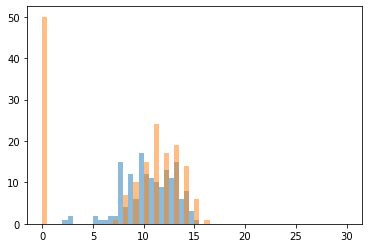

In [11]:
plt.hist(dst.S2w, bins=60, range=(0,30), alpha=0.5)
plt.hist(dst.S2w_sipm, bins=60, range=(0,30), alpha=0.5)
plt.show()

In [12]:
mask_s1 = dst.nS1==1
mask_s2 = np.zeros_like(mask_s1)
mask_s2[mask_s1] = dst[mask_s1].nS2 == 1
nevts_after      = dst[mask_s2].event.nunique()
nevts_before     = dst[mask_s1].event.nunique()
eff              = nevts_after / nevts_before
print('S2 selection efficiency: ', eff*100, '%')

S2 selection efficiency:  99.1304347826087 %


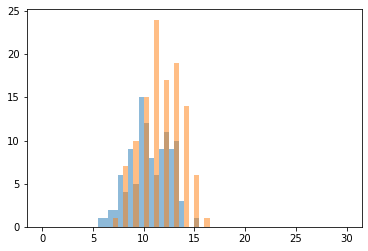

In [13]:
plt.hist(dst[mask_s2].S2w, bins=60, range=(0,30), alpha=0.5)
plt.hist(dst[mask_s2].S2w_sipm, bins=60, range=(0,30), alpha=0.5)
plt.show()

In [19]:
dst.Nsipm

0      1792
1      1792
2      1792
3      1792
4      1792
       ... 
159    1792
160    1792
161    1792
162    1792
163    1792
Name: Nsipm, Length: 164, dtype: uint16

# Testing noise sampler

In [20]:
from invisible_cities.core.random_sampling import NoiseSampler

In [22]:
dbfile = 'new'
run_number = 8088
NS = NoiseSampler(dbfile, run_number)

In [23]:
NS

In [25]:
de = NS.dark_expectation(sample_width=10)

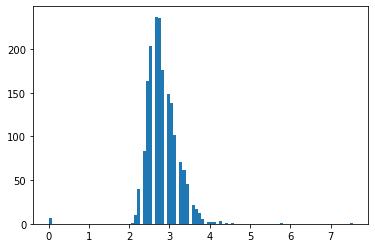

In [29]:
plt.hist(de, bins=100)
plt.show()

In [30]:
np.mean(de*1e3)

2814.7042410714284

In [31]:
2814/1792

1.5703125

In [33]:
thresholds = [(0,0), (0,2), (0,4), (0,6), (0,8), (0,10), (0,12), (0,14), (0,16), (0,18), (0,20),
             (1,0), (1,2), (1,4), (1,6), (1,8), (1,10), (1,12), (1,14), (1,16), (1,18), (1,20),
             (2,0), (2,2), (2,4), (2,6), (2,8), (2,10), (2,12), (2,14), (2,16), (2,18), (2,20),
             (3,0), (3,2), (3,4), (3,6), (3,8), (3,10), (3,12), (3,14), (3,16), (3,18), (3,20),
             (4,0), (4,2), (4,4), (4,6), (4,8), (4,10), (4,12), (4,14), (4,16), (4,18), (4,20)]

In [34]:
len(thresholds)

55

In [46]:
thresholds[44]

(4, 0)

In [ ]:
bad_data = [11,22, 33, 44]

In [53]:
dst = load_dsts(['../../data/test/run_8088_trigger1_0_kdsts.h5'], 'DST', 'Events')
pmaps = pmaps_io.load_pmaps('../../data/test/run_8088_trigger1_0_pmaps.h5')

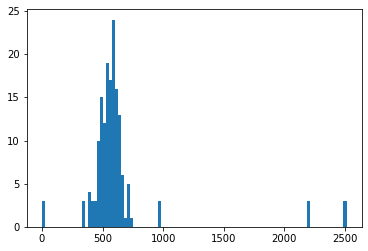

In [54]:
plt.hist(dst.S2q, bins=100)
plt.show()

In [55]:
### Select events with 1 S1 and 1 S2
mask_s1 = dst.nS1==1
mask_s2 = np.zeros_like(mask_s1)
mask_s2[mask_s1] = dst[mask_s1].nS2 == 1
nevts_after      = dst[mask_s2].event.nunique()
nevts_before     = dst[mask_s1].event.nunique()
eff              = nevts_after / nevts_before
print('S2 selection efficiency: ', eff*100, '%')

S2 selection efficiency:  99.1304347826087 %


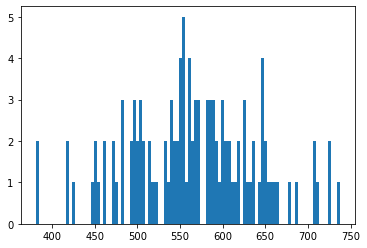

In [56]:
plt.hist(dst.S2q[mask_s2], bins=100)
plt.show()

In [59]:
cwfs = np.array([0,1,2,5,5,1,0])
thr = 2
np.where(cwfs > thr, cwfs, -999)

array([-999, -999, -999,    5,    5, -999, -999])